# Kaggle IBM HR Analytics Employee Attrition & Performance

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import math
import scipy.stats

def randomSample(data):
    atti_yes = data.loc[data['Attrition'] == 1]
    atti_yes_test = atti_yes.iloc[list(random.sample(range(0,atti_yes.shape[0]), int(atti_yes.shape[0]*0.1)))]
    atti_no = data.loc[data['Attrition'] == 0]
    atti_no_test = atti_no.iloc[list(random.sample(range(0,atti_no.shape[0]), int(atti_no.shape[0]*0.1)))]
    atti_yes_train = data.iloc[[item for item in list(atti_yes.index.values) if item not in list(atti_yes_test.index.values)]]
    atti_no_train = data.iloc[[item for item in list(atti_no.index.values) if item not in list(atti_no_test.index.values)]]
    train_set = pd.concat([atti_yes_train, atti_no_train])
    test_set = pd.concat([atti_no_test, atti_yes_test])
    return train_set, test_set

def countZeroBin(bin_edge, hist, bin_space):
    histData = np.delete(np.concatenate((bin_edge.repeat(2)[1:-1].reshape(bin_space*2,1), hist.repeat(2).reshape(bin_space*2,1)), axis=1).reshape(bin_space,4), 1,1)
    # print(histData)
    count = 0
    for i in range(len(histData)):
        if(histData[i][2]==0): count+=1
#     print('number is zero bin = ', count)
    return count

def computeDisplay(tp, tn, fp, fn):
    if(tp+tn+fp+fn == 0): accuracy = 0
    else: accuracy = (tp+tn)/(tp+tn+fp+fn)
    if(tp+fp==0): precision = 0
    else: precision = tp/(tp+fp)
    if(tp+fn==0): recall = 0
    else: recall = tp/(tp+fn)
    if(precision+recall == 0): fscore = 0
    else: fscore = 2*(precision*recall)/(precision+recall)
    if(fp+tn==0): fpr = 0
    else: fpr = fp/(fp+tn)
    print('accuracy = ',accuracy*100, '%')
    print('f-score = ',fscore*100,'%')
    print('precision  = ',precision*100,'%')
    print('recall = ',recall*100,'%')
    return accuracy, fscore, precision, recall, fpr

def compute(tp, tn, fp, fn):
    if(tp+tn+fp+fn == 0): accuracy = 0
    else: accuracy = (tp+tn)/(tp+tn+fp+fn)
    if(tp+fp==0): precision = 0
    else: precision = tp/(tp+fp)
    if(tp+fn==0): recall = 0
    else: recall = tp/(tp+fn)
    if(precision+recall == 0): fscore = 0
    else: fscore = 2*(precision*recall)/(precision+recall)
    if(fp+tn==0): fpr = 0
    else: fpr = fp/(fp+tn)
    return accuracy, fscore, precision, recall, fpr


def randomOneZero():
    rand = random.random()
    if(rand) < 0.5: return 0
    else: return 1
    
def computelHx_discrete(train_set):
    leave = train_set[train_set['Attrition']==1.0]
    stay = train_set[train_set['Attrition']==0.0]
    
    lHxList=[]

    train_set_noAtti = train_set.drop(columns = "Attrition")
    for i in range(len(test_set)):
        lHx = np.log(pLeave) - np.log(pStay)
        x = test_set[i:i+1]
        atti_x = x.iloc[0][1]
        for col in x:
            xi = x[col].values[0]
            if(xi==-1 or math.isnan(xi) or col=="Attrition"):
                continue
            train_col_no_nan = train_set_noAtti[train_set_noAtti[col] != -1]
            train_col_no_nan = train_col_no_nan[~np.isnan(train_col_no_nan[col])][col]
            bin_space = min(len(np.unique(train_col_no_nan)),10) # select proper bin space
            hist, bin_edge_data = np.histogram(train_col_no_nan, bin_space)
    
            train_col_no_nan_stay = stay[~np.isnan(stay[col])][col]
            hist_stay, bin_edge_stay = np.histogram(train_col_no_nan_stay, bin_edge_data)
    
            train_col_no_nan_leave = leave[~np.isnan(leave[col])][col]
            hist_leave, bin_edge_leave = np.histogram(train_col_no_nan_leave, bin_edge_data)
    
            bin_leave = np.digitize(xi,bin_edge_leave)
            if(bin_leave<1): bin_leave=1
            if(bin_leave>=len(bin_edge_leave)): bin_leave=len(bin_edge_leave)-1
            pxlleave = hist_leave[bin_leave-1]/sum(hist_leave)
                
            bin_stay = np.digitize(xi,bin_edge_stay)
            if(bin_stay<1): bin_stay=1
            if(bin_stay>=len(bin_edge_stay)): bin_stay=len(bin_edge_stay)-1
            pxlstay = hist_stay[bin_stay-1]/sum(hist_stay)
                
            if(pxlleave!=0 and pxlstay!=0):
                lHx += (np.log(pxlleave)-np.log(pxlstay))
        
        lHxList.insert(len(lHxList), lHx)
        
    return lHxList

def computelHx_discrete_binSize_n(train_set, n):
    leave = train_set[train_set['Attrition']==1.0]
    stay = train_set[train_set['Attrition']==0.0]
    
    lHxList=[]

    train_set_noAtti = train_set.drop(columns = "Attrition")
    for i in range(len(test_set)):
        lHx = np.log(pLeave) - np.log(pStay)
        x = test_set[i:i+1]
        atti_x = x.iloc[0][1]
        for col in x:
            xi = x[col].values[0]
            if(xi==-1 or math.isnan(xi) or col=="Attrition"):
                continue
            train_col_no_nan = train_set_noAtti[train_set_noAtti[col] != -1]
            train_col_no_nan = train_col_no_nan[~np.isnan(train_col_no_nan[col])][col]
            bin_space = n
            hist, bin_edge_data = np.histogram(train_col_no_nan, bin_space)
    
            train_col_no_nan_stay = stay[~np.isnan(stay[col])][col]
            hist_stay, bin_edge_stay = np.histogram(train_col_no_nan_stay, bin_edge_data)
            
            train_col_no_nan_leave = leave[~np.isnan(leave[col])][col]
            hist_leave, bin_edge_leave = np.histogram(train_col_no_nan_leave, bin_edge_data)
    
            bin_leave = np.digitize(xi,bin_edge_leave)
            if(bin_leave<1): bin_leave=1
            if(bin_leave>=len(bin_edge_leave)): bin_leave=len(bin_edge_leave)-1
            pxlleave = hist_leave[bin_leave-1]/sum(hist_leave)
                
            bin_stay = np.digitize(xi,bin_edge_stay)
            if(bin_stay<1): bin_stay=1
            if(bin_stay>=len(bin_edge_stay)): bin_stay=len(bin_edge_stay)-1
            pxlstay = hist_stay[bin_stay-1]/sum(hist_stay)
                
            if(pxlleave!=0 and pxlstay!=0):
                lHx += (np.log(pxlleave)-np.log(pxlstay))
            
        plt.show()
        lHxList.insert(len(lHxList), lHx)
        
    return lHxList

def computelHx_normal(train_set):
    leave = train_set[train_set['Attrition']==1.0]
    stay = train_set[train_set['Attrition']==0.0]
    
    lHxList=[]
    
    train_set_noAtti = train_set.drop(columns = "Attrition")
    for i in range(len(test_set)):
        lHx = np.log(pLeave) - np.log(pStay)
        x = test_set[i:i+1]
        atti_x = x.iloc[0][1]
        for col in x:
            xi = x[col].values[0]
            if(xi==-1 or math.isnan(xi) or col=="Attrition"):
                continue

            train_col_no_nan_stay = stay[~np.isnan(stay[col])][col]
            mean_stay = train_col_no_nan_stay.mean()
            std_stay = train_col_no_nan_stay.std()
    
            train_col_no_nan_leave = leave[~np.isnan(leave[col])][col]
            mean_leave = train_col_no_nan_leave.mean()
            std_leave = train_col_no_nan_leave.std()
        
            if(min_x_leave!=max_x_leave and min_x_stay!=max_x_stay):
                pxlstay = scipy.stats.norm(mean_stay, std_stay).pdf(xi)
                pxlleave = scipy.stats.norm(mean_leave, std_leave).pdf(xi)
            
                    
            if(pxlleave!=0 and pxlstay!=0 and ~np.isnan(pxlleave) and ~np.isnan(pxlstay)):
                 lHx += (np.log(pxlleave)-np.log(pxlstay))

        lHxList.insert(len(lHxList), lHx)
        
    return lHxList

def classifylHx(lHxList, test_set, t):
    tp=0
    tn=0
    fp=0
    fn=0
    i=0
    for lHx in lHxList:
#         print('lHx(', lHx, ') >= t(',t,') ?',lHx >= t)
        test_data = test_set["Attrition"].tolist()[i]
        if(lHx>=t): predictAtti = 1
        else: predictAtti = 0
        if(test_data==1 and lHx>=t): tp+=1
        elif(test_data==0 and lHx<t): tn+=1
        elif(test_data==1 and lHx<t): fn+=1
        elif(test_data==0 and lHx>=t): fp+=1
        i+=1
    return tp, tn, fp, fn

In [2]:
all = pd.read_csv("hr-employee-attrition-with-null.csv", index_col=0)

In [3]:
all.loc[all["Attrition"] == "No", "Attrition"] = 0.0
all.loc[all["Attrition"] == "Yes", "Attrition"] = 1.0
for col in all:
    if(all[col].dtype=='object'):
        all[col] = pd.Categorical(all[col]).codes
all = all.drop(columns = "EmployeeNumber")
# all

In [4]:
train_set, test_set = randomSample(all)

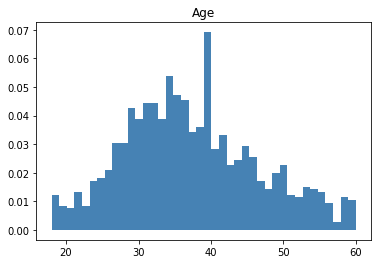

Number of zero bins:  0


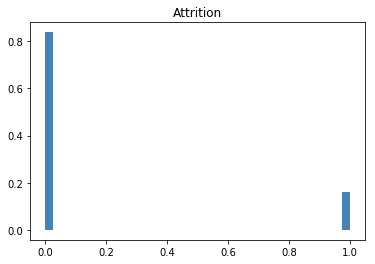

Number of zero bins:  38


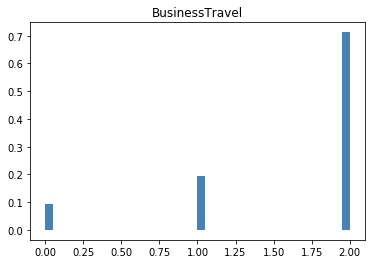

Number of zero bins:  37


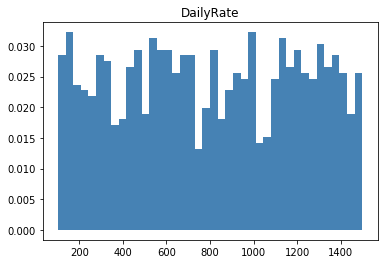

Number of zero bins:  0


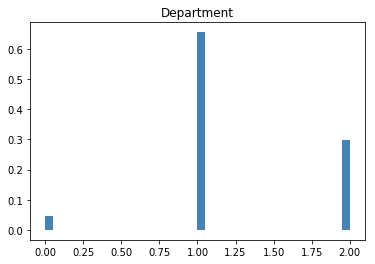

Number of zero bins:  37


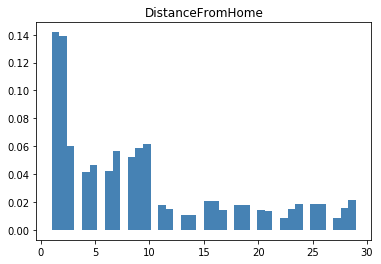

Number of zero bins:  11


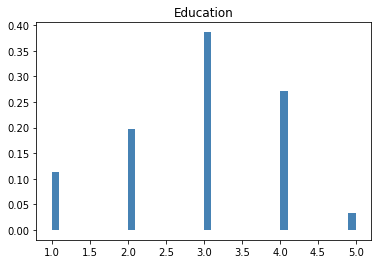

Number of zero bins:  35


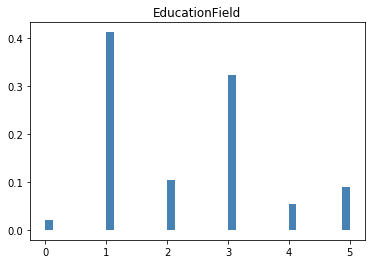

Number of zero bins:  34


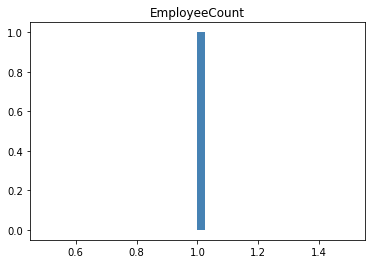

Number of zero bins:  39


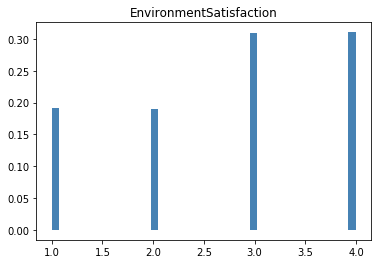

Number of zero bins:  36


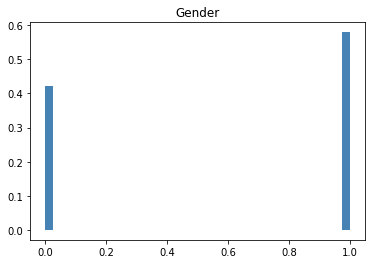

Number of zero bins:  38


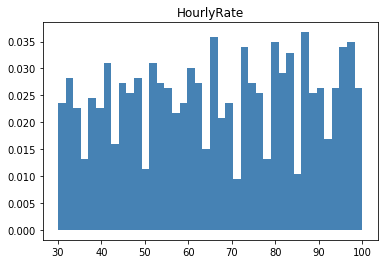

Number of zero bins:  0


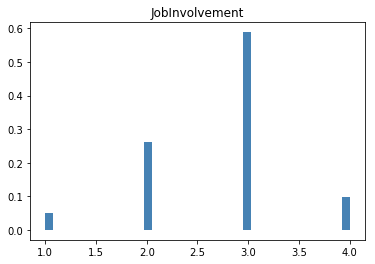

Number of zero bins:  36


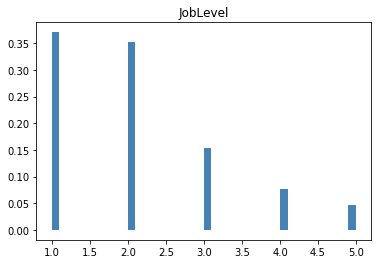

Number of zero bins:  35


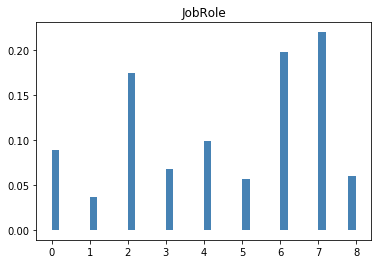

Number of zero bins:  31


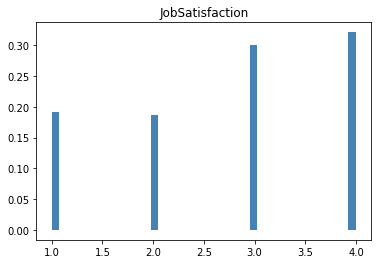

Number of zero bins:  36


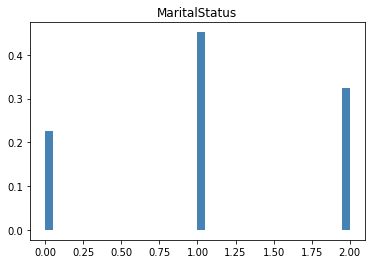

Number of zero bins:  37


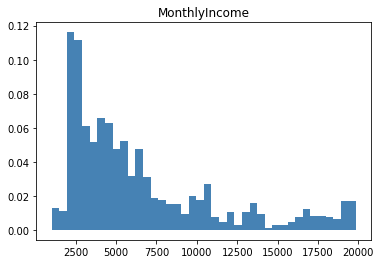

Number of zero bins:  0


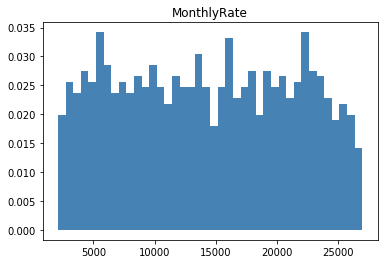

Number of zero bins:  0


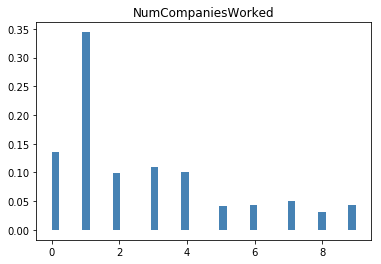

Number of zero bins:  30


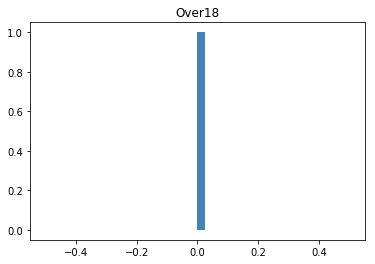

Number of zero bins:  39


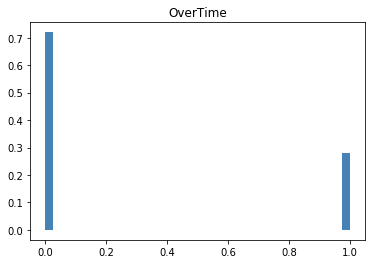

Number of zero bins:  38


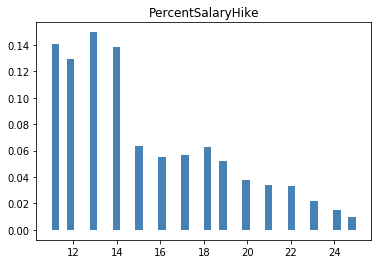

Number of zero bins:  25


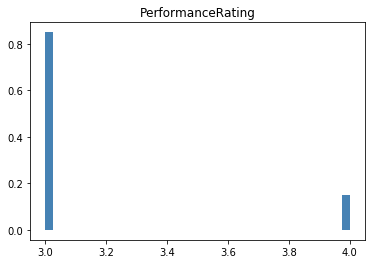

Number of zero bins:  38


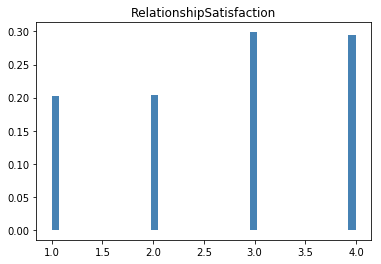

Number of zero bins:  36


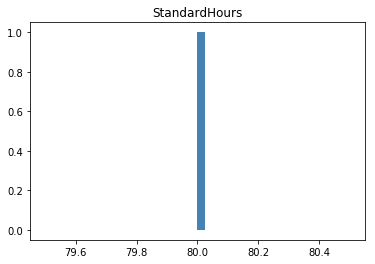

Number of zero bins:  39


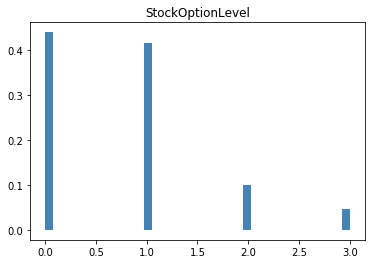

Number of zero bins:  36


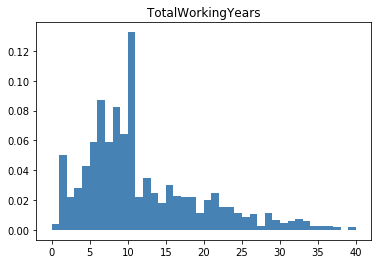

Number of zero bins:  1


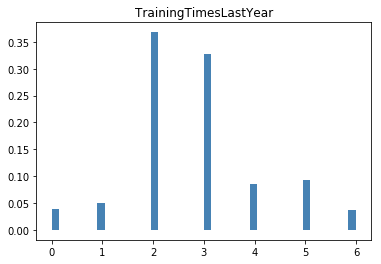

Number of zero bins:  33


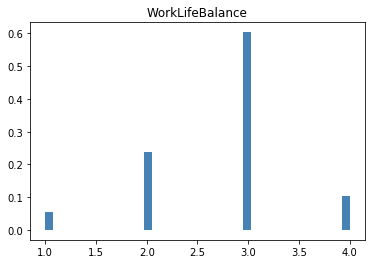

Number of zero bins:  36


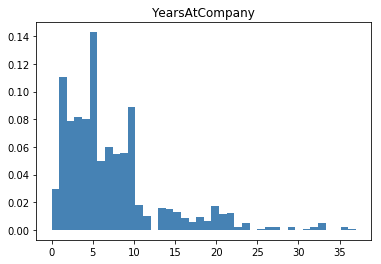

Number of zero bins:  6


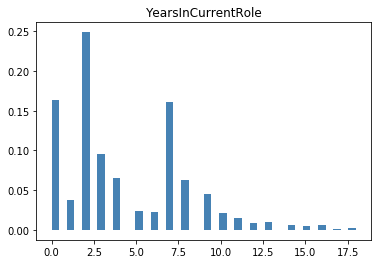

Number of zero bins:  21


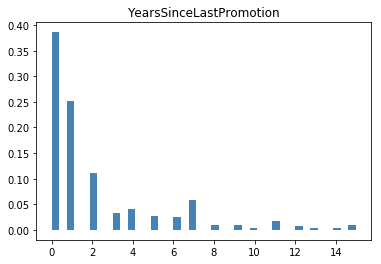

Number of zero bins:  24


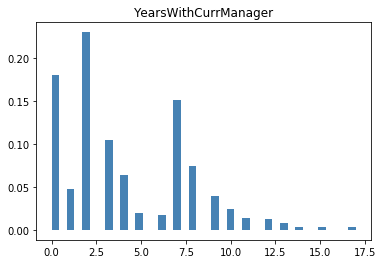

Number of zero bins:  23


In [5]:
for col in all:
    bin_space = 40
    train_col_no_nan = train_set[train_set[col] != -1]
    train_col_no_nan = train_col_no_nan[~np.isnan(train_col_no_nan[col])][col]
    hist, bin_edge = np.histogram(train_col_no_nan, bin_space)
    plt.fill_between(bin_edge.repeat(2)[1:-1],hist.repeat(2)/sum(hist),facecolor='steelblue') 
    plt.title(col)
    plt.show()
    print('Number of zero bins: ',countZeroBin(bin_edge, hist, bin_space))

# T4
### Observe the histograms. Can we use a Gaussian to estimate this histogram? Why? What about a Gaussian Mixture Model (GMM)?
#### sol:
we can use gaussian to estimate the data, but it is not a best estimation method since the model could be underfitted. On the other hand, GMM can yield more accurate model since data is not evenly distributed. We can use GMM to make the model significantly more accurate. However, one may note that adding too many gaussian mixture can result in overfitting model.
# T5
### How many bins have zero counts? Do you think this is a good discretization? Why?
#### sol:
some histogram got no zero bins while some got many(since the data are 0 and 1). This is a good discretization since most of the data got no zero bin. We will avoid having zero bins in data since it can yield an error on estimating likelihood). Seeing that there are still zero bin data, we can still yield a better discretization result.

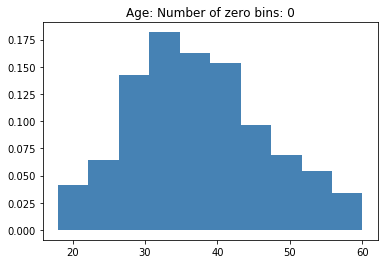

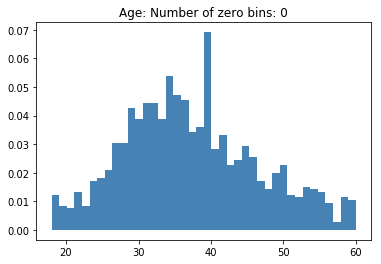

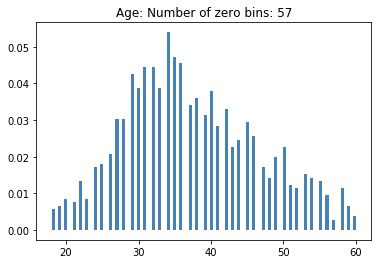

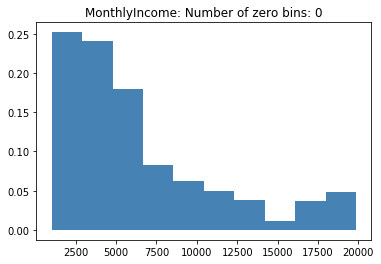

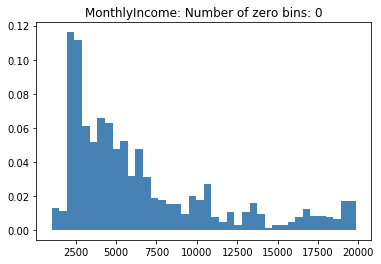

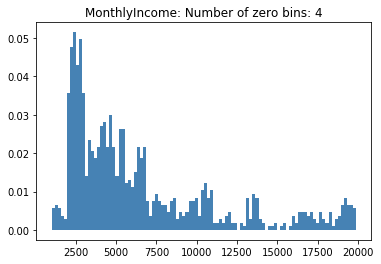

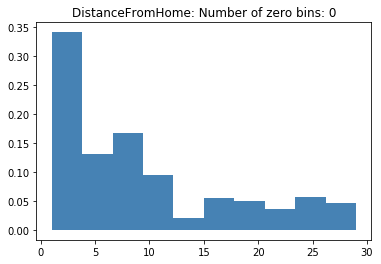

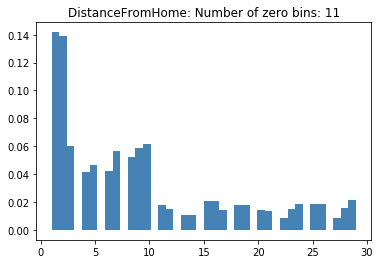

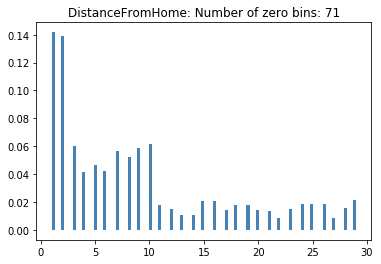

In [6]:
for col in ['Age', 'MonthlyIncome', 'DistanceFromHome']:
    for bin_space in [10, 40, 100]:
        train_col_no_nan = train_set[train_set[col] != -1]
        train_col_no_nan = train_col_no_nan[~np.isnan(train_col_no_nan[col])][col]
        hist, bin_edge = np.histogram(train_col_no_nan, bin_space)
        plt.fill_between(bin_edge.repeat(2)[1:-1],hist.repeat(2)/sum(hist),facecolor='steelblue') 
        plt.title(col + ": Number of zero bins: %d" % countZeroBin(bin_edge, hist, bin_space))
        plt.show()
#         print("Number of zero bins: %d" % countZeroBin(bin_edge, hist, bin_space))

# T6
### Which bin size is most sensible for each features? Why?
#### sol:
the most suitable bin size for each features is the value that yield no zero-bin.
##### feature Age: 
bin size of 40
##### feature Monthly Income:
bin size of 40
##### feature Distance from Home:
bin size of 10

# T7
### For the rest of the features, which one should be discretized? What are the criteria for choosing whether we should discretize a feature or not? 
#### sol:
These data should also be discretized is the feature that is not qualitative, such as rating from 1 to 4. The citeria is to check whether the histogram contain more than 10 uniques data set.

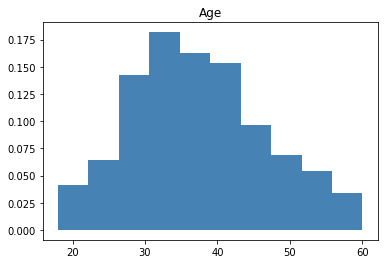

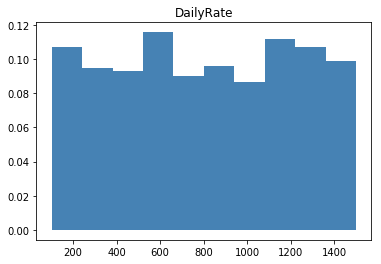

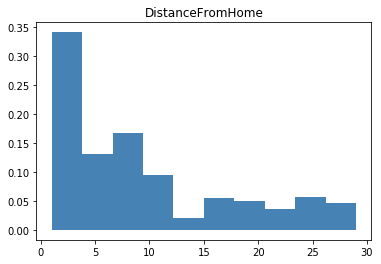

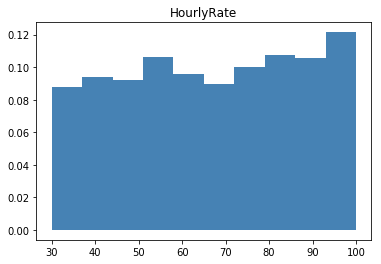

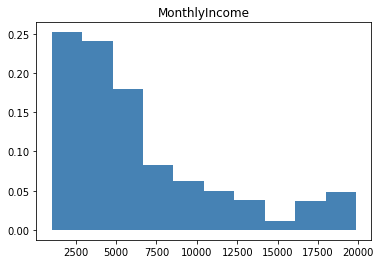

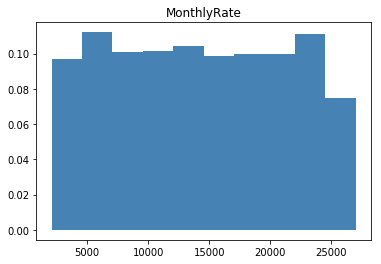

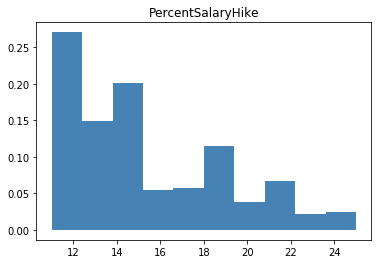

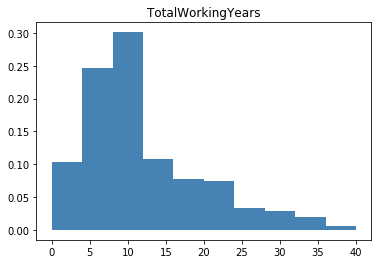

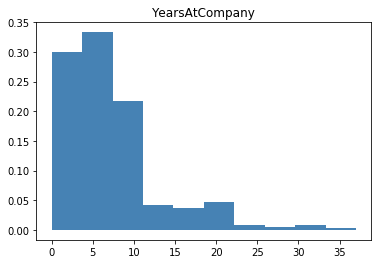

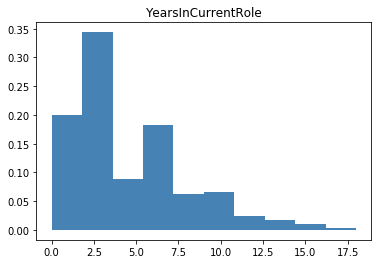

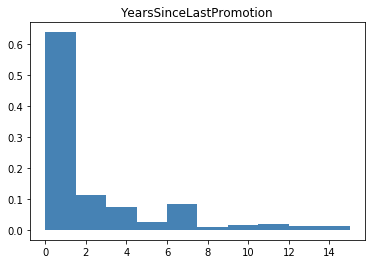

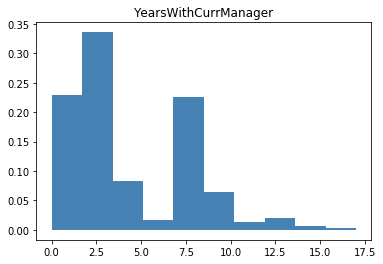

In [7]:
data = []
for col in all:
    bin_space = 10
    train_col_no_nan = train_set[~np.isnan(train_set[col])][col]
    if len(np.unique(train_col_no_nan)) > 10:
        hist, bin_edge = np.histogram(train_col_no_nan, bin_space)
        if(countZeroBin(bin_edge, hist, bin_space) == 0):
            plt.fill_between(bin_edge.repeat(2)[1:-1],hist.repeat(2)/sum(hist),facecolor='steelblue') 
            plt.title(col)
            plt.show()

# T8
### What kind of distribution should we use to model histograms?  What is the MLE for the likelihood distributions of each of the 33 features? (Describe how to estimate the distributions for each type of feature).
#### sol:
the model that is selected from task 7 should be approximated using gaussian model while other should be use discrete distribution.

In [8]:
mleTrain = train_set.drop(columns = "Attrition")
leave = train_set[train_set['Attrition']==1.0]
stay = train_set[train_set['Attrition']==0.0]
for col in mleTrain:
    mleTrain_col_no_nan = mleTrain[mleTrain[col] != -1]
    mleTrain_col_no_nan = mleTrain_col_no_nan[~np.isnan(mleTrain_col_no_nan[col])][col]
    hist, bin_edge_data = np.histogram(mleTrain_col_no_nan, bin_space)
    
    mleTrain_col_no_nan_stay = stay[~np.isnan(stay[col])][col]
    hist, bin_edge_stay = np.histogram(mleTrain_col_no_nan_stay, bin_edge_data)
#     plt.plot(bin_edge_data.repeat(2)[1:-1], hist.repeat(2)/sum(hist))
    
    mleTrain_col_no_nan_leave = leave[~np.isnan(leave[col])][col]
    hist, bin_edge_leave = np.histogram(mleTrain_col_no_nan_leave, bin_edge_data)
#     plt.plot(bin_edge_data.repeat(2)[1:-1],hist.repeat(2)/sum(hist))
    
#     plt.title(col)
#     plt.legend(['stay', 'leave'],loc=9, bbox_to_anchor=(0.5, -0.1), ncol=2)
#     plt.show()
    
    ind = np.digitize(list(mleTrain_col_no_nan), bin_edge_stay)
    mle = 0
    for i in ind:
        if(i<1): i=1
        if(i>=len(hist)): i=len(hist)-1
        p = hist[i-1]/sum(hist)
        if(p==0): continue
        mle += np.log(p)
    ind = np.digitize(list(mleTrain_col_no_nan), bin_edge_leave)
    for i in ind:
        if(i<1): i=1
        if(i>=len(hist)): i=len(hist)-1
        p = hist[i-1]/sum(hist)
        if(p==0): continue
        mle += np.log(p)
    print('mle of', col, ' = ',mle)

mle of Age  =  -4803.7374167969165
mle of BusinessTravel  =  -1160.8270856809522
mle of DailyRate  =  -4933.804236096153
mle of Department  =  -1140.1177873288518
mle of DistanceFromHome  =  -4162.501029857439
mle of Education  =  -2709.6116193960415
mle of EducationField  =  -3235.1703343239296
mle of EmployeeCount  =  0.0
mle of EnvironmentSatisfaction  =  -2173.2588081427784
mle of Gender  =  -867.0530596623715
mle of HourlyRate  =  -4954.985801597026
mle of JobInvolvement  =  -1674.9871153461854
mle of JobLevel  =  -2786.800406385056
mle of JobRole  =  -4639.335424915237
mle of JobSatisfaction  =  -1979.1538274091201
mle of MaritalStatus  =  -1985.0251201814276
mle of MonthlyIncome  =  -3624.5726900111663
mle of MonthlyRate  =  -4907.24707353168
mle of NumCompaniesWorked  =  -4428.73574091674
mle of Over18  =  0.0
mle of OverTime  =  -1067.1333964009893
mle of PercentSalaryHike  =  -4296.067766696182
mle of PerformanceRating  =  -298.10930690376466
mle of RelationshipSatisfaction  

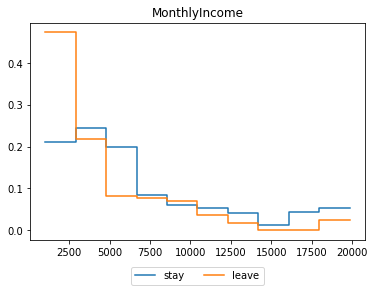

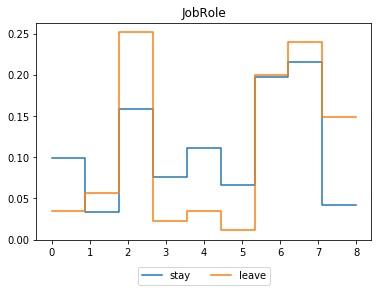

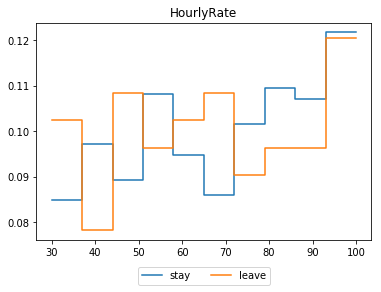

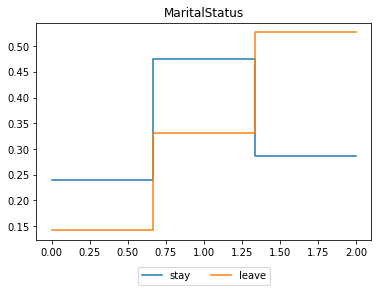

In [9]:
for col in ['MonthlyIncome', 'JobRole', 'HourlyRate', 'MaritalStatus']:
    train_col_no_nan = train_set[train_set[col] != -1]
    train_col_no_nan = train_col_no_nan[~np.isnan(train_col_no_nan[col])][col]
    bin_space = min(len(np.unique(train_col_no_nan)),10) # select proper bin space
    hist, bin_edge_data = np.histogram(train_col_no_nan, bin_space)
    
    train_col_no_nan_stay = stay[~np.isnan(stay[col])][col]
    hist, bin_edge = np.histogram(train_col_no_nan_stay, bin_edge_data)
    plt.plot(bin_edge_data.repeat(2)[1:-1],hist.repeat(2)/sum(hist))
    
    train_col_no_nan_leave = leave[~np.isnan(leave[col])][col]
    hist, bin_edge = np.histogram(train_col_no_nan_leave, bin_edge_data)
    plt.plot(bin_edge_data.repeat(2)[1:-1],hist.repeat(2)/sum(hist))
    
    plt.title(col)
    plt.legend(['stay', 'leave'],loc=9, bbox_to_anchor=(0.5, -0.1), ncol=2)
    plt.show()

# T9
### What is the prior distribution of the two classes?

In [10]:
pLeave = leave.shape[0]/(leave.shape[0]+stay.shape[0])
pStay = stay.shape[0]/(leave.shape[0]+stay.shape[0])
print('P(leave) = ',pLeave)
print('P(stay) = ', pStay)

P(leave) =  0.16163141993957703
P(stay) =  0.8383685800604229


# T10

### Use the learned distributions to classify the test set. Don’t forget to allow your classifier to handle missing values in the test set. Report the overall Accuracy. Then, report the Precision, Recall, and F score for detecting attrition. See Lecture 1 for the definitions of each metric.

lH(x) = logp(leave) − logp(stay)+ Σi=1[logp(xi|leave) − logpp(xi|stay)]

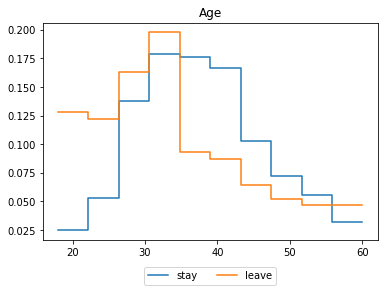

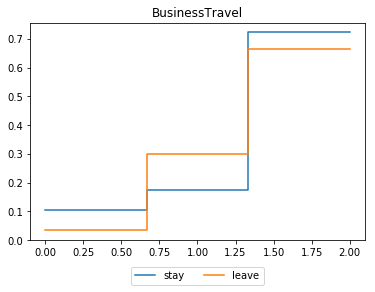

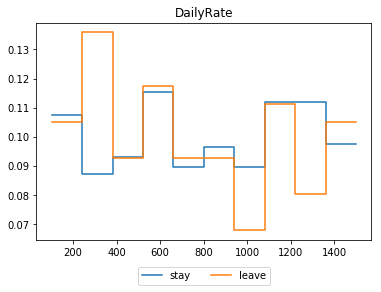

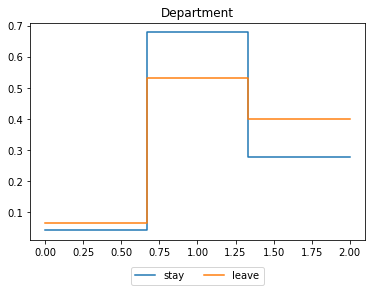

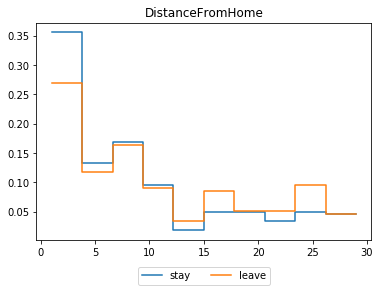

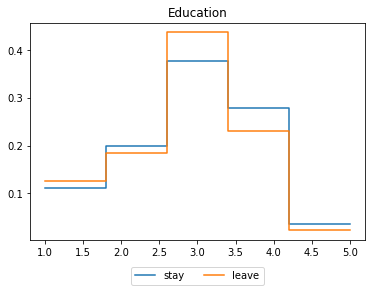

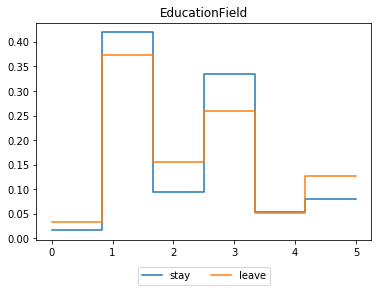

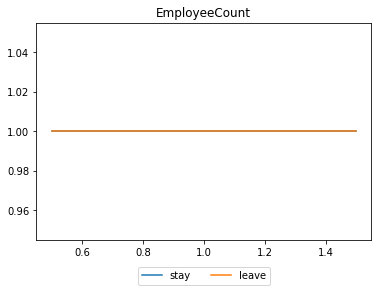

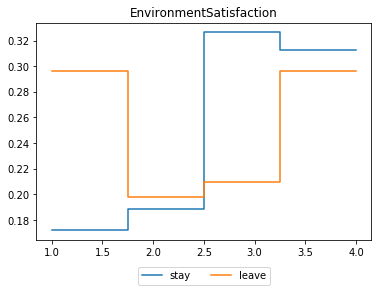

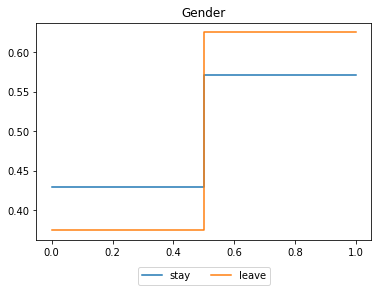

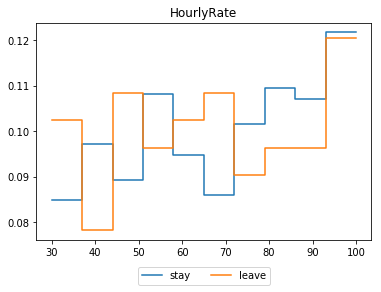

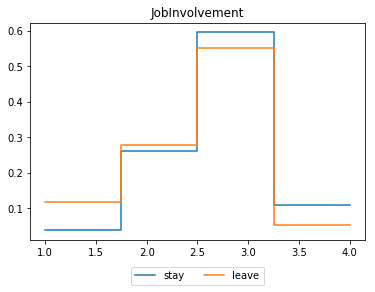

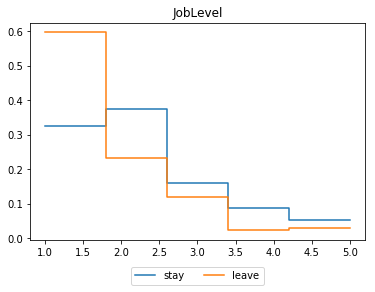

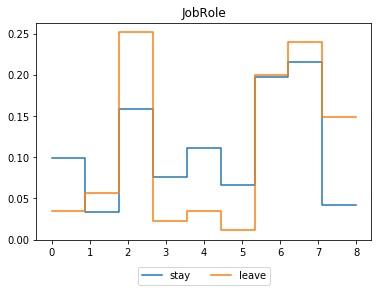

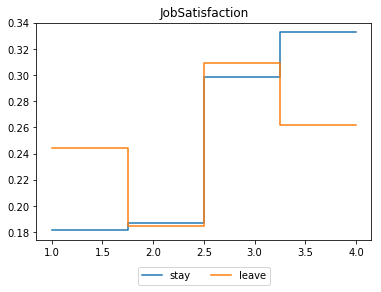

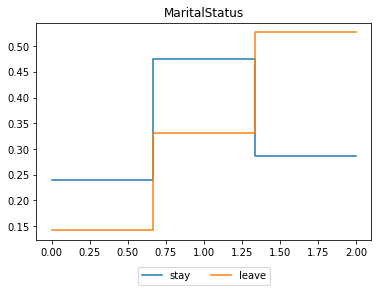

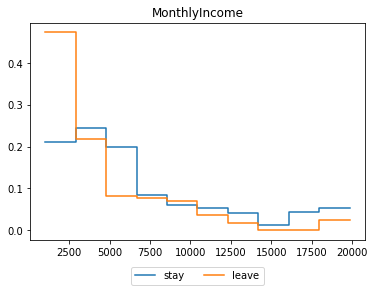

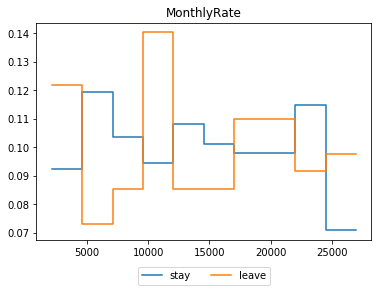

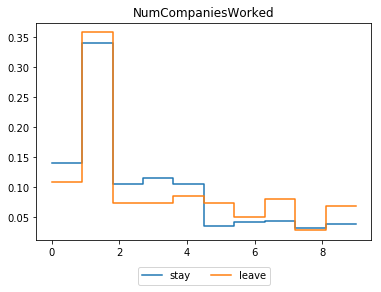

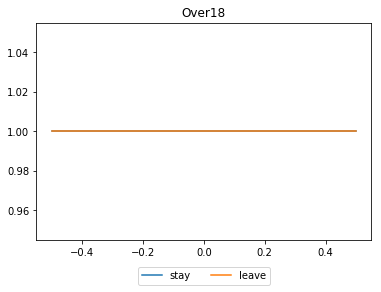

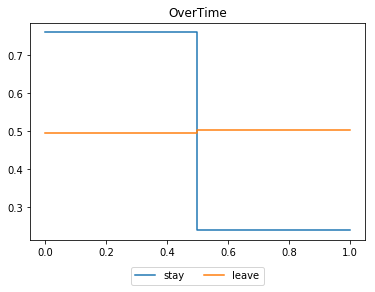

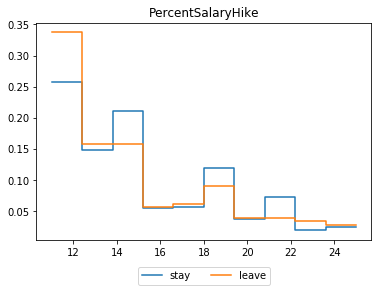

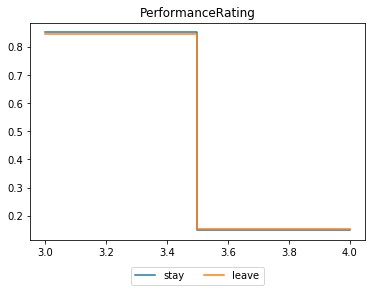

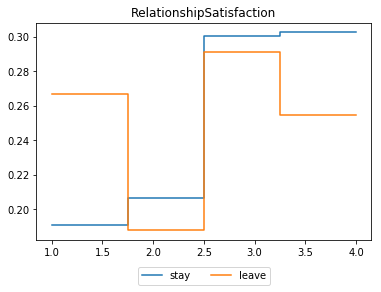

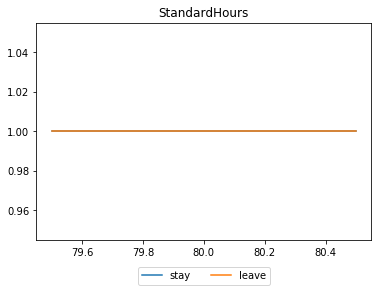

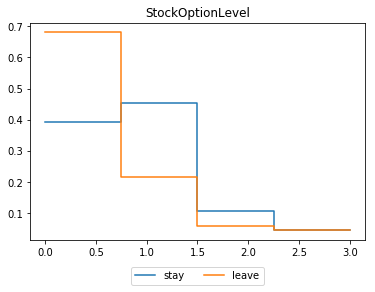

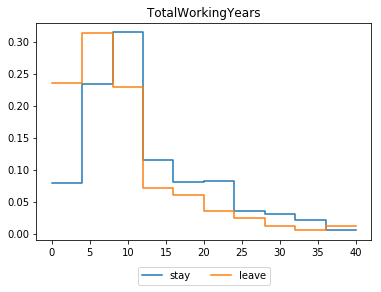

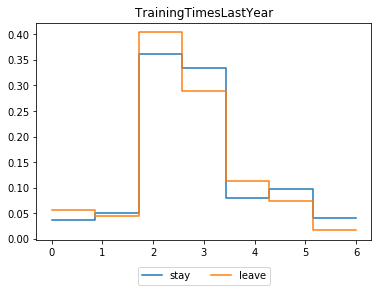

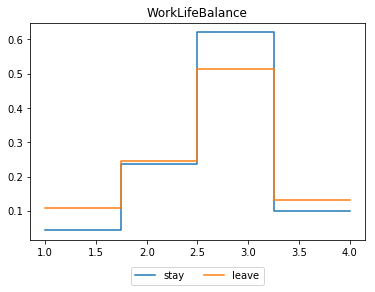

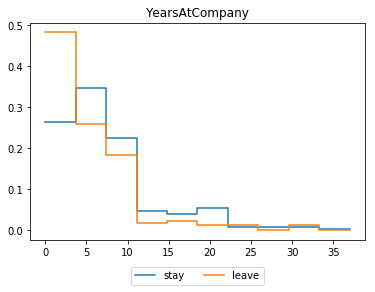

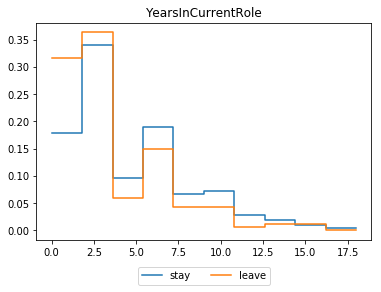

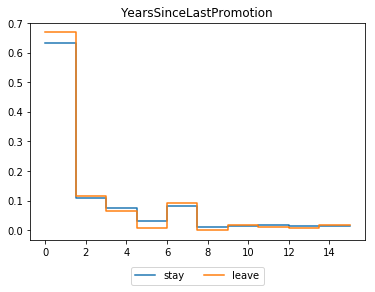

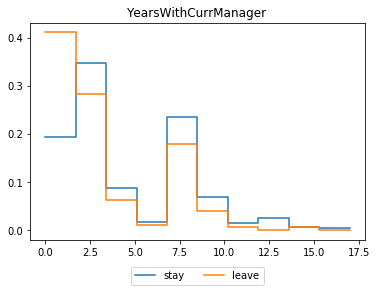

In [11]:
train_set_noAtti = train_set.drop(columns = "Attrition")
for col in train_set_noAtti:
    train_col_no_nan = train_set_noAtti[train_set_noAtti[col] != -1]
    train_col_no_nan = train_col_no_nan[~np.isnan(train_col_no_nan[col])][col]
    bin_space = min(len(np.unique(train_col_no_nan)),10) # select proper bin space
    hist, bin_edge_data = np.histogram(train_col_no_nan, bin_space)
    
    train_col_no_nan_stay = stay[~np.isnan(stay[col])][col]
    hist, bin_edge = np.histogram(train_col_no_nan_stay, bin_edge_data)
    plt.plot(bin_edge_data.repeat(2)[1:-1],hist.repeat(2)/sum(hist))
    
    train_col_no_nan_leave = leave[~np.isnan(leave[col])][col]
    hist, bin_edge = np.histogram(train_col_no_nan_leave, bin_edge_data)
    plt.plot(bin_edge_data.repeat(2)[1:-1],hist.repeat(2)/sum(hist))
    
    plt.title(col)
    plt.legend(['stay', 'leave'],loc=9, bbox_to_anchor=(0.5, -0.1), ncol=2)
    plt.show()

In [12]:
lHx_discrete = computelHx_discrete(train_set)
tp, tn, fp, fn = classifylHx(lHx_discrete, test_set, 0)
accuracy, fScore, precision, recall, fpr = computeDisplay(tp,tn, fp,fn)

accuracy =  80.13698630136986 %
f-score =  43.13725490196078 %
precision  =  39.285714285714285 %
recall =  47.82608695652174 %


# T11
### Use the learned distributions to classify the test set. Report the results using the same metric as the previous question

Age
mean:  37.28598484848485
std:  9.237551253031121


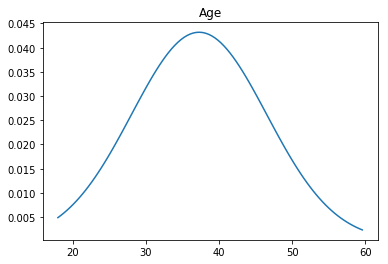

BusinessTravel
mean:  1.6192271442035815
std:  0.6502305587166081


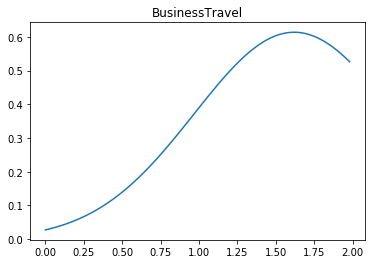

DailyRate
mean:  799.6104265402844
std:  408.1072091970252


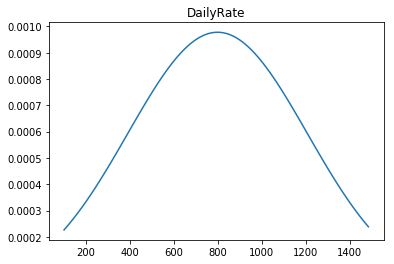

Department
mean:  1.2521246458923512
std:  0.5304372055778074


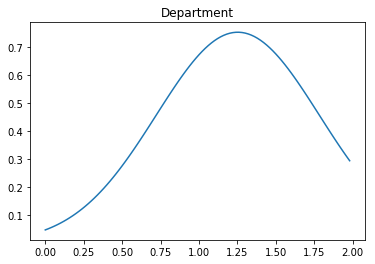

DistanceFromHome
mean:  9.242911153119092
std:  8.182784836234552


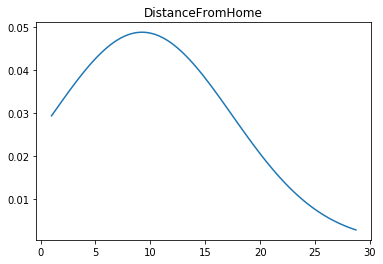

Education
mean:  2.9127134724857684
std:  1.0239161176676776


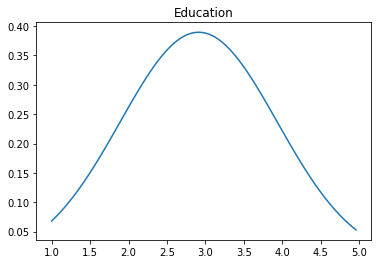

EducationField
mean:  2.243879472693032
std:  1.3289480566943226


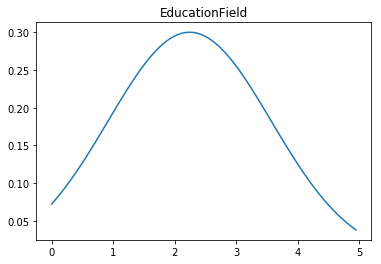

EmployeeCount
mean:  1.0
std:  0.0
feature  EmployeeCount  cannot be plotted

EnvironmentSatisfaction
mean:  2.7384760112888054
std:  1.0941103804517731


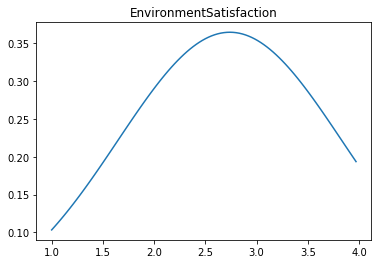

Gender
mean:  0.5794481446241675
std:  0.49388265419832555


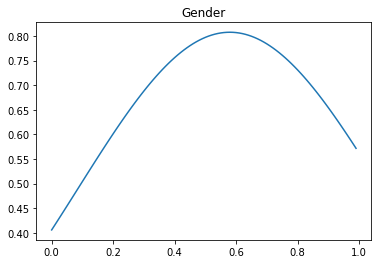

HourlyRate
mean:  66.03389830508475
std:  20.40528982027463


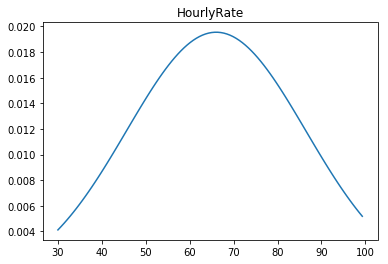

JobInvolvement
mean:  2.7355450236966825
std:  0.701865947300787


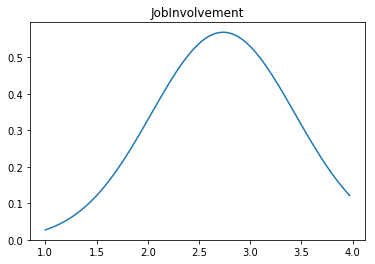

JobLevel
mean:  2.0786729857819903
std:  1.1192935145473994


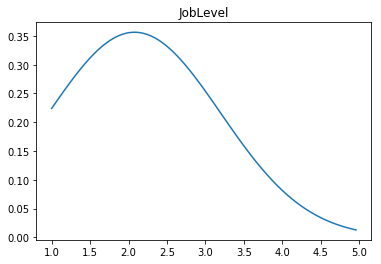

JobRole
mean:  4.470532319391635
std:  2.4653809516630814


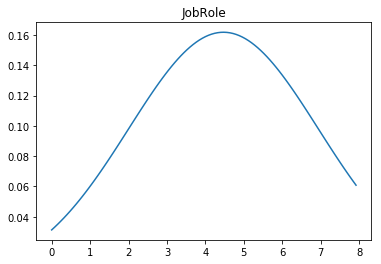

JobSatisfaction
mean:  2.7516587677725117
std:  1.1015491063655414


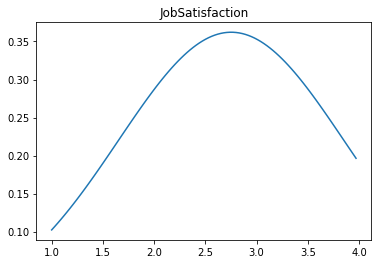

MaritalStatus
mean:  1.0991501416430596
std:  0.7343768078865918


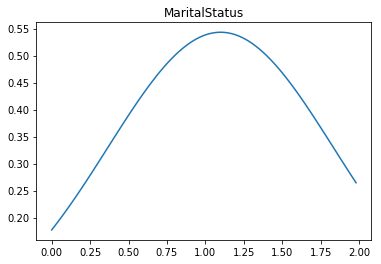

MonthlyIncome
mean:  6515.913857677902
std:  4745.192463585784


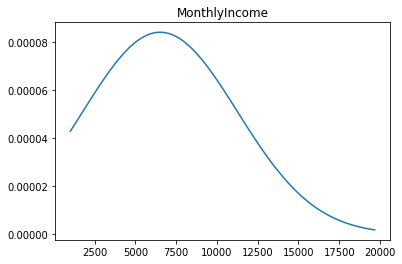

MonthlyRate
mean:  14246.862298195632
std:  7044.439673442398


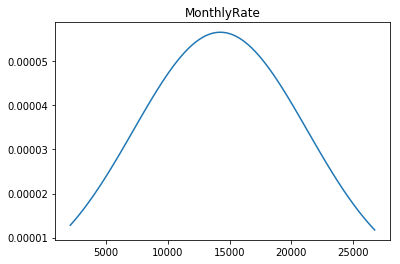

NumCompaniesWorked
mean:  2.7415413533834587
std:  2.53960609685219


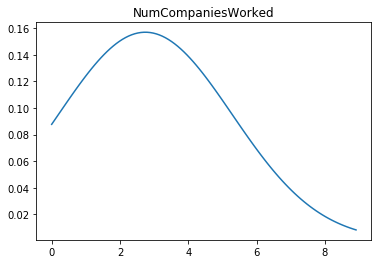

Over18
mean:  0.0
std:  0.0
feature  Over18  cannot be plotted

OverTime
mean:  0.280188679245283
std:  0.44930327163292294


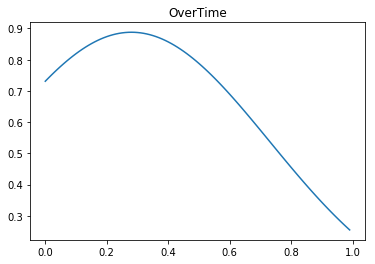

PercentSalaryHike
mean:  15.204545454545455
std:  3.6300246342587386


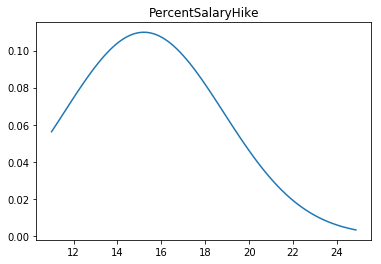

PerformanceRating
mean:  3.149621212121212
std:  0.3568687526538426


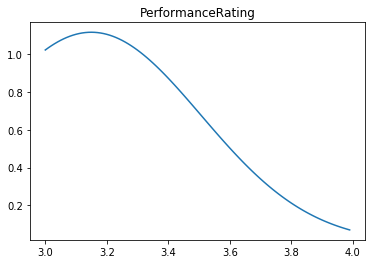

RelationshipSatisfaction
mean:  2.6861451460885957
std:  1.1008085937368102


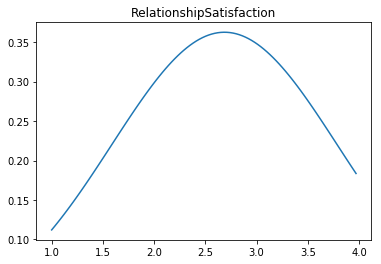

StandardHours
mean:  80.0
std:  0.0
feature  StandardHours  cannot be plotted

StockOptionLevel
mean:  0.7521367521367521
std:  0.8123966399934895


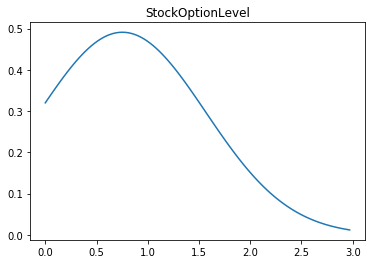

TotalWorkingYears
mean:  11.302083333333334
std:  7.71006822626833


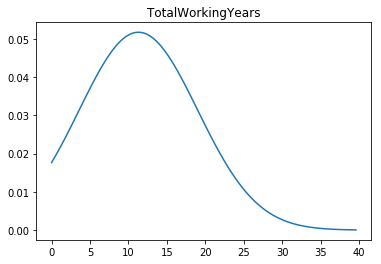

TrainingTimesLastYear
mean:  2.7971563981042653
std:  1.293903185962366


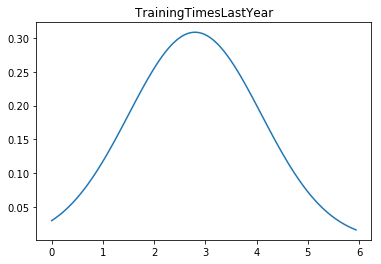

WorkLifeBalance
mean:  2.757805108798486
std:  0.707105514186937


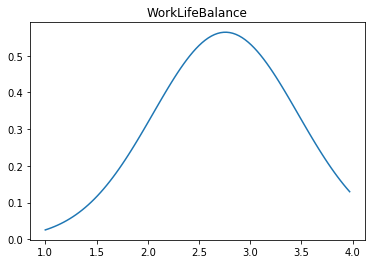

YearsAtCompany
mean:  7.102175969725638
std:  6.079411744125529


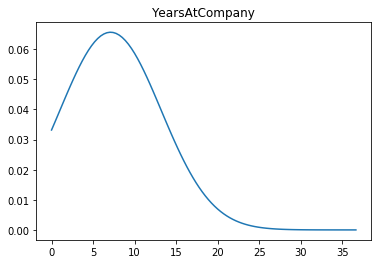

YearsInCurrentRole
mean:  4.2924976258309595
std:  3.6260452447745535


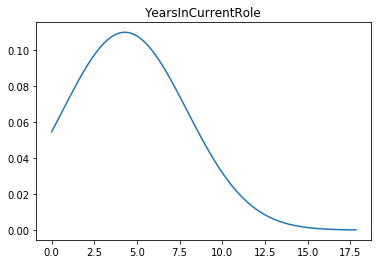

YearsSinceLastPromotion
mean:  2.188785046728972
std:  3.1922886243187447


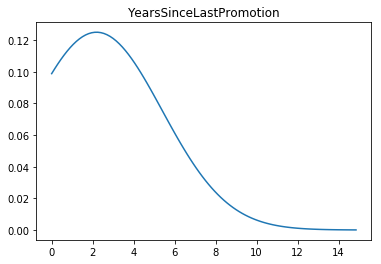

YearsWithCurrManager
mean:  4.107243650047037
std:  3.5177481433298756


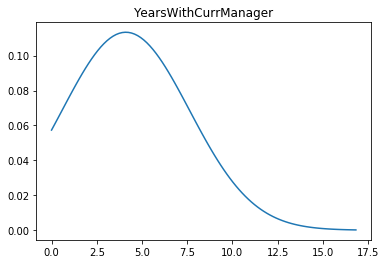

In [13]:
train_set_noAtti = train_set.drop(columns = "Attrition")
for col in train_set_noAtti:
    train_col_no_nan = train_set_noAtti[train_set_noAtti[col] != -1]
    train_col_no_nan = train_col_no_nan[~np.isnan(train_col_no_nan[col])][col]
    mean = train_col_no_nan.mean()
    std = train_col_no_nan.std()
    print(col)
    print('mean: ', mean)
    print('std: ',std)
    
    min_x = train_col_no_nan.min()
    max_x = train_col_no_nan.max()
    
    if(min_x==max_x): 
        print('feature ',col,' cannot be plotted\n')
        continue

    range_x = np.arange(min_x, max_x, (max_x - min_x) / 100)

    plt.plot(range_x, scipy.stats.norm(mean, std).pdf(range_x))
    
    plt.title(col)
    plt.show()
    
    train_col_no_nan_stay = stay[~np.isnan(stay[col])][col]
    mean_stay = train_col_no_nan_stay.mean()
    std_stay = train_col_no_nan_stay.std()
    
    train_col_no_nan_leave = leave[~np.isnan(leave[col])][col]
    mean_leave = train_col_no_nan_leave.mean()
    std_leave = train_col_no_nan_leave.std()

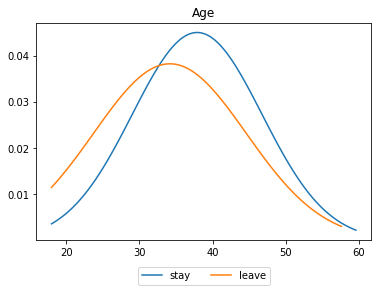

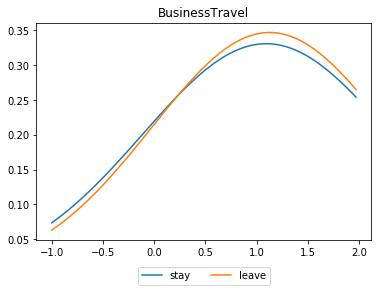

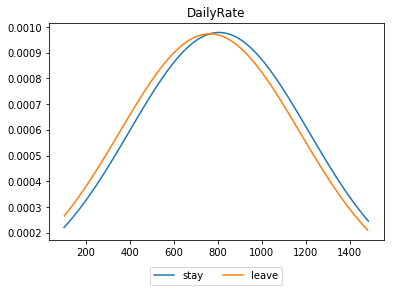

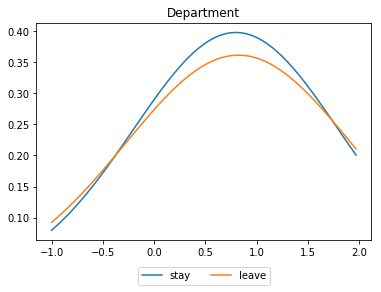

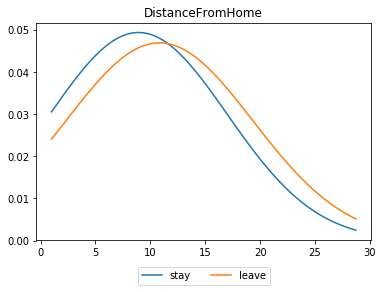

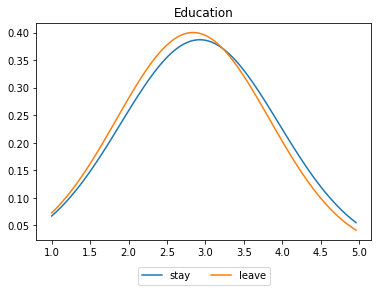

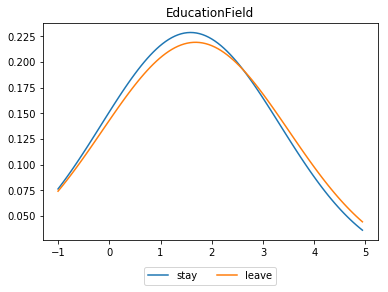

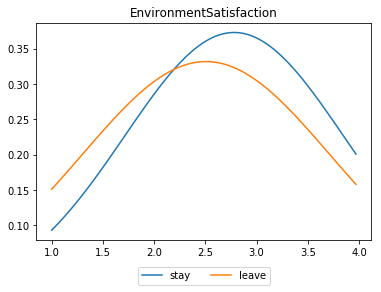

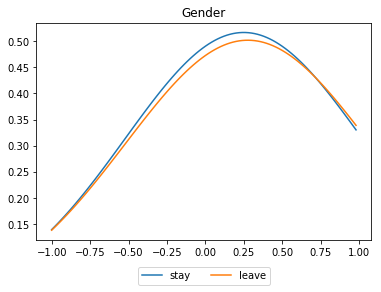

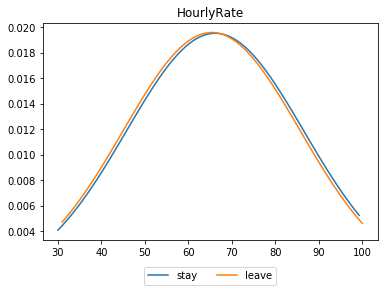

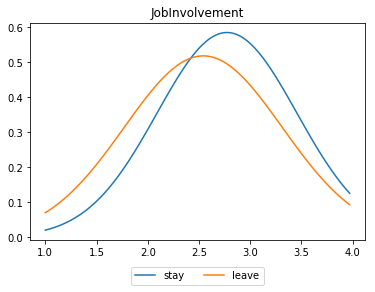

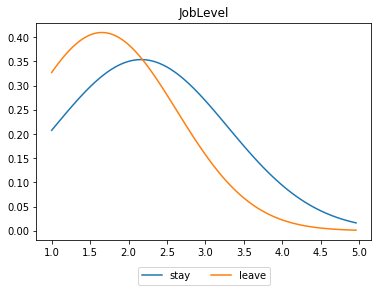

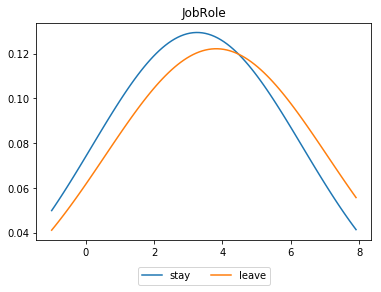

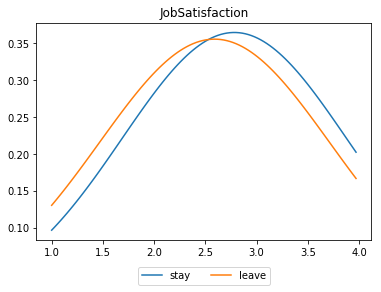

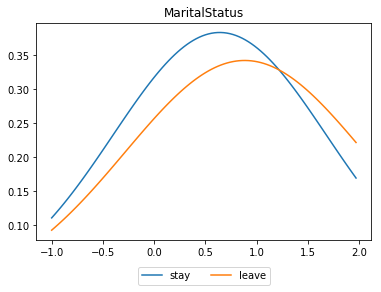

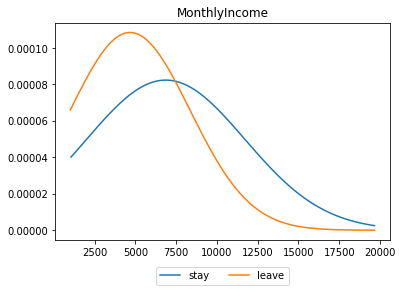

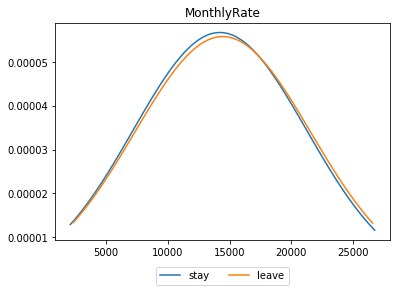

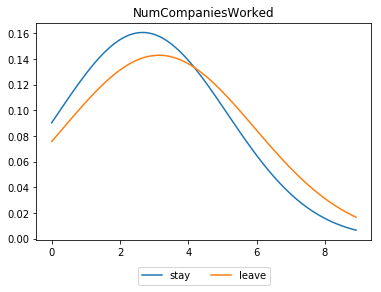

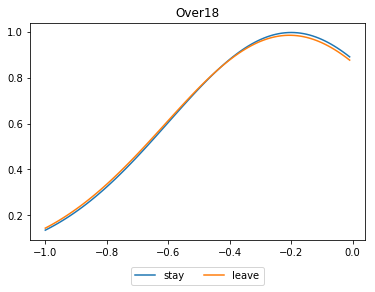

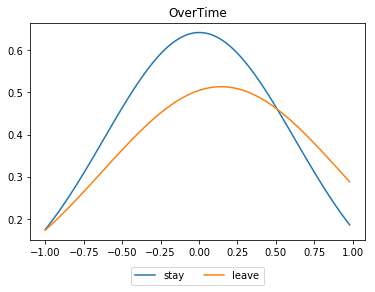

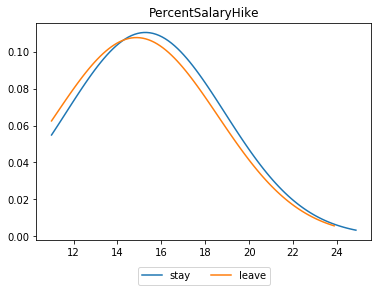

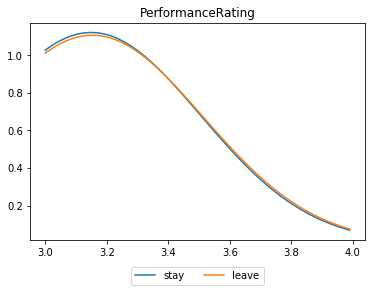

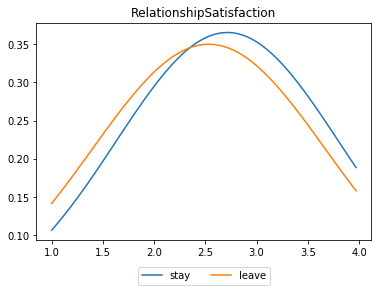

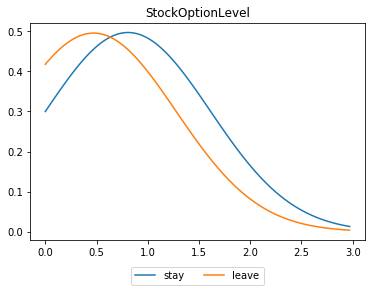

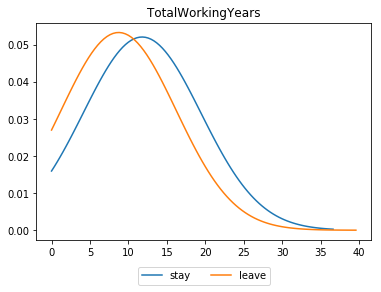

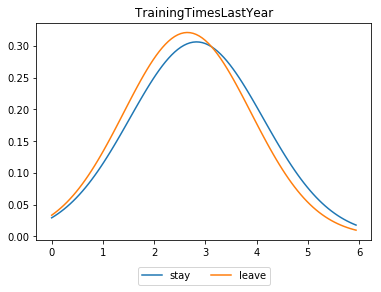

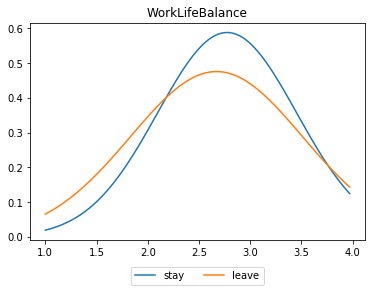

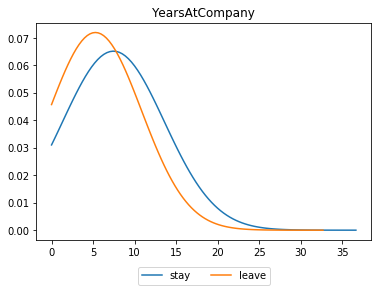

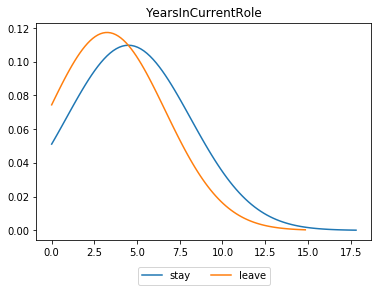

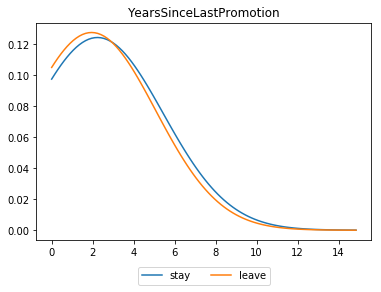

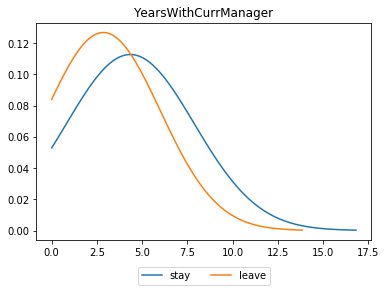

In [14]:
train_set_noAtti = train_set.drop(columns = "Attrition")
for col in train_set_noAtti:
    train_col_no_nan = train_set_noAtti[train_set_noAtti[col] != -1]
    train_col_no_nan = train_col_no_nan[~np.isnan(train_col_no_nan[col])][col]

    train_col_no_nan_stay = stay[~np.isnan(stay[col])][col]
    mean_stay = train_col_no_nan_stay.mean()
    std_stay = train_col_no_nan_stay.std()
    min_x_stay = train_col_no_nan_stay.min()
    max_x_stay = train_col_no_nan_stay.max()
    
    
    
    train_col_no_nan_leave = leave[~np.isnan(leave[col])][col]
    mean_leave = train_col_no_nan_leave.mean()
    std_leave = train_col_no_nan_leave.std()
    min_x_leave = train_col_no_nan_leave.min()
    max_x_leave = train_col_no_nan_leave.max()
    
    
    if(min_x_leave!=max_x_leave and min_x_stay!=max_x_stay):
        range_x_stay = np.arange(min_x_stay, max_x_stay, (max_x_stay - min_x_stay) / 100)
        range_x_leave = np.arange(min_x_leave, max_x_leave, (max_x_leave - min_x_leave) / 100)
        plt.plot(range_x_stay, scipy.stats.norm(mean_stay, std_stay).pdf(range_x_stay))
        plt.plot(range_x_leave, scipy.stats.norm(mean_leave, std_leave).pdf(range_x_leave))
        plt.title(col)
        plt.legend(['stay', 'leave'],loc=9, bbox_to_anchor=(0.5, -0.1), ncol=2)
    plt.show()

In [15]:
lHx_normal = computelHx_normal(train_set)
tp, tn, fp, fn = classifylHx(lHx_normal, test_set, 0)
accuracy, fScore, precision, recall, fpr = computeDisplay(tp,tn, fp,fn)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1652: RuntimeWarning: invalid value encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)


accuracy =  81.5068493150685 %
f-score =  52.63157894736842 %
precision  =  44.11764705882353 %
recall =  65.21739130434783 %


# T12
### The random choice baseline is the accuracy if you make a random guess for each test sample. Give random guess (50% leaving, and 50% staying) to the test samples. Report the overall Accuracy. Then, report the Precision, Recall, and F score for attrition prediction using the random choice baseline.

In [16]:
tp=0
tn=0
fp=0
fn=0
err=0
train_set_noAtti = train_set.drop(columns = "Attrition")
for i in range(len(test_set)):
    lHx = np.log(pLeave) - np.log(pStay)
    x = test_set[i:i+1]
    atti_x = x.iloc[0][1]

    predictAtti = randomOneZero() 
    if(predictAtti!=atti_x.tolist()): err+=1;
#     print(i,predictAtti,atti_x.tolist(), err,  (len(test_set)-err)/len(test_set)*100,'%')
    if(test_set["Attrition"].tolist()[i]==1 and predictAtti==1): tp+=1
    elif(test_set["Attrition"].tolist()[i]==0 and predictAtti==0): tn+=1
    elif(test_set["Attrition"].tolist()[i]==1 and predictAtti==0): fn+=1
    elif(test_set["Attrition"].tolist()[i]==0 and predictAtti==1): fp+=1
accuracy, fScore, precision, recall, fpr = computeDisplay(tp,tn, fp,fn)

accuracy =  50.68493150684932 %
f-score =  26.53061224489796 %
precision  =  17.333333333333336 %
recall =  56.52173913043478 %


# T13
### The majority rule is the accuracy if you use the most frequent class from the training set as the classification decision. Report the overall Accuracy. Then, report the Precision, Recall, and F score for attrition prediction using the majority rule baseline.

In [17]:
tp=0
tn=0
fp=0
fn=0
err=0

for i in range(len(test_set)):
    vote = len(leave) > len(stay)
    if(vote): predictAtti = 1
    else: predictAtti = 0
        
    if(predictAtti!=atti_x.tolist()): err+=1;
#     print(i,predictAtti,atti_x.tolist(), err,  (len(test_set)-err)/len(test_set)*100,'%')
    if(test_set["Attrition"].tolist()[i]==1 and predictAtti==1): tp+=1
    elif(test_set["Attrition"].tolist()[i]==0 and predictAtti==0): tn+=1
    elif(test_set["Attrition"].tolist()[i]==1 and predictAtti==0): fn+=1
    elif(test_set["Attrition"].tolist()[i]==0 and predictAtti==1): fp+=1
        
accuracy, fScore, precision, recall, fpr = computeDisplay(tp,tn, fp,fn)

accuracy =  84.24657534246576 %
f-score =  0 %
precision  =  0 %
recall =  0.0 %


# T14
### Compare the two baselines with your Naive Bayes classifier.
#### sol
Majority rule and random method are the first two choice to be ignored since randoming yield an unpredictable model and majority rule yield 0% for f-score, precision, and recall. Gaussian and Discrete distribution, however, are the two suitable choice to be chosen. Since discrete distribution perform slightly better than gaussian model, discrete distribution is the suitable choice in this case. However, with GMM model, the result could be better since the GMM could fit the histogram better.

# T15.
### Use the following threshold values
t = np.arange(-5,5,0.05)

### discrete distribution

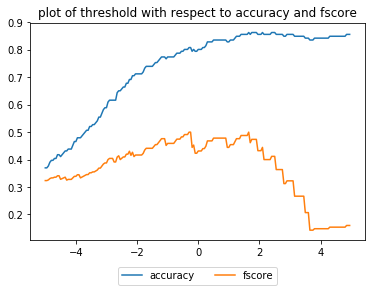

Maximum accuracy at  86.3013698630137 %, at t =  1.6499999999999764
Maximum f-score at  50.0 %, at t =  -0.3000000000000167


In [18]:
t = np.arange(-5,5,0.05)
fs = []
acc = []
fpr_discrete = []
tpr_discrete = []
fsMax = 0
t_fsMax = 0
accMax = 0
t_accMax = 0
for th in t:
    tp, tn, fp, fn = classifylHx(lHx_discrete, test_set, th)
    accuracy, fscore, precision, recall, fpr = compute(tp,tn, fp,fn)
    acc.insert(len(acc), accuracy)
    fs.insert(len(fs), fscore)
    if(fscore > fsMax): 
        fsMax = fscore
        t_fsMax = th
    if(accuracy > accMax): 
        accMax = accuracy
        t_accMax = th
    fpr_discrete.insert(len(fpr_discrete), fp/(tn+fp))
    tpr_discrete.insert(len(tpr_discrete), recall)
plt.plot(t, acc)
plt.plot(t, fs)
plt.title('plot of threshold with respect to accuracy and fscore')
plt.legend(['accuracy', 'fscore'],loc=9, bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.show()
print('Maximum accuracy at ',accMax*100, '%, at t = ', t_accMax)
print('Maximum f-score at ',fsMax*100, '%, at t = ', t_fsMax)

### normal distribution

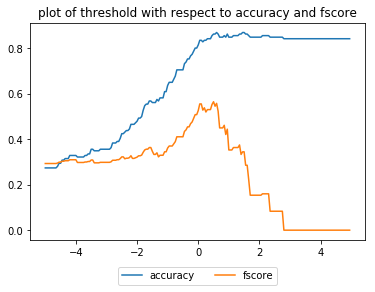

Maximum accuracy at  86.98630136986301 %, at t =  0.5999999999999801
Maximum f-score at  56.52173913043478 %, at t =  0.49999999999998046


In [19]:
t = np.arange(-5,5,0.05)
fs = []
acc = []
fsMax = 0
t_fsMax = 0
accMax = 0
t_accMax = 0
fpr_normal = []
tpr_normal = []
for th in t:
    tp, tn, fp, fn = classifylHx(lHx_normal, test_set, th)
    accuracy, fscore, precision, recall, fpr = compute(tp,tn, fp,fn)
    acc.insert(len(acc), accuracy)
    fs.insert(len(fs), fscore)
    if(fscore > fsMax): 
        fsMax = fscore
        t_fsMax = th
    if(accuracy > accMax): 
        accMax = accuracy
        t_accMax = th
    fpr_normal.insert(len(fpr_normal), fp/(tn+fp))
    tpr_normal.insert(len(tpr_normal), recall)
plt.plot(t, acc)
plt.plot(t, fs)
plt.title('plot of threshold with respect to accuracy and fscore')
plt.legend(['accuracy', 'fscore'],loc=9, bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.show()
print('Maximum accuracy at ',accMax*100, '%, at t = ', t_accMax)
print('Maximum f-score at ',fsMax*100, '%, at t = ', t_fsMax)

# T16
### Plot the RoC of your classifier

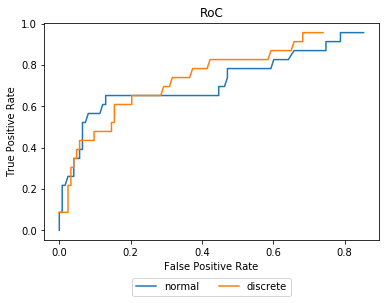

In [20]:
plt.plot(fpr_normal, tpr_normal)
plt.plot(fpr_discrete, tpr_discrete)
plt.title('RoC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['normal', 'discrete'],loc=9, bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.show()

# T17
### Change the number of discretization bins to 5

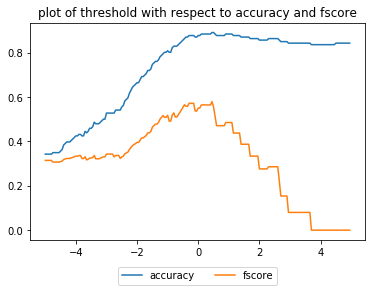

Maximum accuracy at  89.04109589041096 %, at t =  0.44999999999998064
Maximum f-score at  57.89473684210527 %, at t =  0.44999999999998064


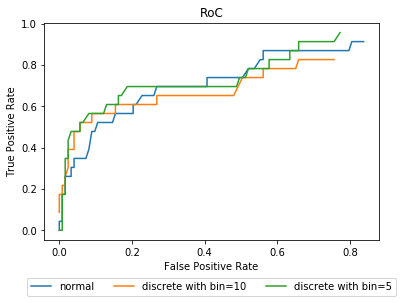

In [21]:
t = np.arange(-5,5,0.05)
fs = []
acc = []
fpr_discrete5 = []
tpr_discrete5 = []
fsMax = 0
t_fsMax = 0
accMax = 0
t_accMax = 0
tp5 = 0
tn5 = 0
fp5 = 0
fn5 = 0
lHx_discrete_bin5 = computelHx_discrete_binSize_n(train_set, 5)
for th in t:
    tp5, tn5, fp5, fn5 = classifylHx(lHx_discrete_bin5, test_set, th)
    accuracy5, fscore5, precision5, recall5, fpr5 = compute(tp5,tn5, fp5,fn5)
    acc.insert(len(acc), accuracy5)
    fs.insert(len(fs), fscore5)
    if(fscore5 > fsMax): 
        fsMax = fscore5
        t_fsMax = th
    if(accuracy5 > accMax): 
        accMax = accuracy5
        t_accMax = th
    fpr_discrete5.insert(len(fpr_discrete5), fpr5)
    tpr_discrete5.insert(len(tpr_discrete5), recall5)
plt.plot(t, acc)
plt.plot(t, fs)
plt.title('plot of threshold with respect to accuracy and fscore')
plt.legend(['accuracy', 'fscore'],loc=9, bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.show()
print('Maximum accuracy at ',accMax*100, '%, at t = ', t_accMax)
print('Maximum f-score at ',fsMax*100, '%, at t = ', t_fsMax)
plt.plot(fpr_normal, tpr_normal)
plt.plot(fpr_discrete, tpr_discrete)
plt.plot(fpr_discrete5, tpr_discrete5)
plt.title('RoC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['normal', 'discrete with bin=10', 'discrete with bin=5'],loc=9, bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.show()

### What happens to the RoC curve? Which discretization is better? The number of discretization bins can be considered as a hyperparameter, and must be chosen by comparing the final performance
#### sol
It is depends on the threshold that is used to be considered which discretize is better. If the threshold is low, bin=10 could be better choice. On the other hand with a high threshold, bin=5 yield a better performance

# OT3
### Shuffle the database, and create new test and train sets. Redo the entire training and evaluation process 10 times (each time with a new training and test set). Calculate the mean and variance of the accuracy rate.

### discrete distribution

In [21]:
accuracy = []
for i in range(1,11):
    train_set, test_set = randomSample(all)
    print('==========Round ',i,'==========')
    max_acc_bin10 = 0
    max_acc_bin5 = 0
    lHx_bin5 = computelHx_discrete_binSize_n(train_set,5)
    lHx_bin10 = computelHx_discrete_binSize_n(train_set,10)
    for t in np.arange(-5,5,0.05):
        tp_bin5, tn_bin5, fp_bin5, fn_bin5 = classifylHx(lHx_bin5,test_set, t)
        acc_bin5, fs_bin5, p_bin5, rc_bin5, fpr_bin5 = compute(tp_bin5, tn_bin5, fp_bin5, fn_bin5)
        tp_bin10, tn_bin10, fp_bin10, fn_bin10 = classifylHx(lHx_bin10,test_set, t)
        acc_bin10, fs_bin10, p_bin10, rc_bin10, fpr_bin10 = compute(tp_bin10, tn_bin10, fp_bin10, fn_bin10)
        if(acc_bin10 > max_acc_bin10): max_acc_bin10 = acc_bin10
        if(acc_bin5 > max_acc_bin5): max_acc_bin5 = acc_bin5
    print('bin size = 10, best accuracy = ',max_acc_bin10*100, '%')
    print('bin size = 5, best accuracy = ',max_acc_bin5*100, '%')
    accuracy.insert(len(accuracy),max_acc_bin10)
    accuracy.insert(len(accuracy),max_acc_bin5)
    if(max_acc_bin10>max_acc_bin5): print('>>> Best accuracy is bin = 10: ', max_acc_bin10*100, '%')
    else: print('>>> Best accuracy is bin = 5: ', max_acc_bin5*100, '%')

==========Round  1 ==========
bin size = 10, best accuracy =  89.72602739726028 %
bin size = 5, best accuracy =  89.04109589041096 %
>>> Best accuracy is bin = 10:  89.72602739726028 %
==========Round  2 ==========
bin size = 10, best accuracy =  87.67123287671232 %
bin size = 5, best accuracy =  88.35616438356165 %
>>> Best accuracy is bin = 5:  88.35616438356165 %
==========Round  3 ==========
bin size = 10, best accuracy =  86.98630136986301 %
bin size = 5, best accuracy =  89.04109589041096 %
>>> Best accuracy is bin = 5:  89.04109589041096 %
==========Round  4 ==========
bin size = 10, best accuracy =  89.04109589041096 %
bin size = 5, best accuracy =  89.04109589041096 %
>>> Best accuracy is bin = 5:  89.04109589041096 %
==========Round  5 ==========
bin size = 10, best accuracy =  87.67123287671232 %
bin size = 5, best accuracy =  89.04109589041096 %
>>> Best accuracy is bin = 5:  89.04109589041096 %
==========Round  6 ==========
bin size = 10, best accuracy =  87.67123287671232

In [27]:
print('mean of accuracy = ',np.mean(accuracy*100), '%')
print('standard deviation of accuracy = ', np.std(accuracy))

mean of accuracy =  0.8773972602739726 %
standard deviation of accuracy =  0.01995726340319653


### normal distribution

In [28]:
accuracy = []
for i in range(1,11):
    train_set, test_set = randomSample(all)
    print('==========Round ',i,'==========')
    max_acc = 0
    lHx = computelHx_normal(train_set)
    for t in np.arange(-5,5,0.05):
        tp, tn, fp, fn = classifylHx(lHx,test_set, t)
        acc, fs, p, rc, fpr = compute(tp, tn, fp, fn)
        if(acc > max_acc): max_acc = acc
    print('best accuracy = ',max_acc*100, '%')
    accuracy.insert(len(accuracy),max_acc)

==========Round  1 ==========


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1652: RuntimeWarning: invalid value encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)


best accuracy =  86.3013698630137 %
==========Round  2 ==========
best accuracy =  87.67123287671232 %
==========Round  3 ==========
best accuracy =  87.67123287671232 %
==========Round  4 ==========
best accuracy =  85.61643835616438 %
==========Round  5 ==========
best accuracy =  86.3013698630137 %
==========Round  6 ==========
best accuracy =  84.93150684931507 %
==========Round  7 ==========
best accuracy =  87.67123287671232 %
==========Round  8 ==========
best accuracy =  84.24657534246576 %
==========Round  9 ==========
best accuracy =  87.67123287671232 %
==========Round  10 ==========
best accuracy =  85.61643835616438 %


In [31]:
print('mean of accuracy = ',np.mean(accuracy*100), '%')
print('standard deviation of accuracy = ', np.std(accuracy))

mean of accuracy =  0.8636986301369863 %
standard deviation of accuracy =  0.01203999714468967
